# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2


### Vamos a trabajar con un dataset de clusters no globulares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

dataset = datasets.make_moons(n_samples=1000, noise=0.05) # usar noise 0.2 para fusionar los clusters
X, y = dataset

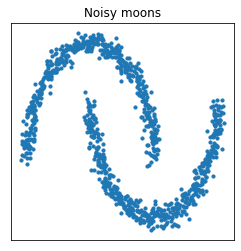

In [2]:
plt.figure(figsize=(4, 4))
plt.title("Noisy moons")
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xticks(())
plt.yticks(())
plt.show()

### Ahora calculamos la kdist plot para MinPts=5

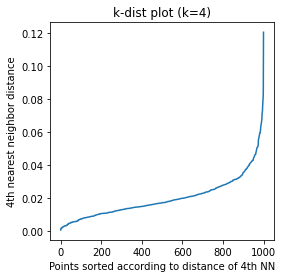

In [3]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(4, 4))
plt.xlabel("Points sorted according to distance of 4th NN")
plt.ylabel("4th nearest neighbor distance")
plt.title("k-dist plot (k=4)")
plt.plot(distances)
plt.show()

### El k-dist plot nos muestra que si queremos clusterizar muchos datos, debemos usar un EPS ~ [0.06 - 0.08]

In [4]:
from sklearn import cluster

dbscan = cluster.DBSCAN(eps=0.08, min_samples=5)
model = dbscan.fit(X)

- eps: The maximum Euclidean distance between two samples for one to be considered as in the neighborhood of the other (def: 0.5)

- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. (def: 5)

### Veamos como quedaron los clusters

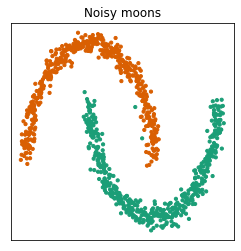

In [5]:
y_pred = model.labels_.astype(int) # en esta parte vemos en qué cluster quedó cada dato

def colour(x):
    return plt.cm.Dark2(x)

colors = list(map(colour,y_pred))

plt.figure(figsize=(4, 4))
plt.title("Noisy moons")
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors)
plt.xticks(())
plt.yticks(())
plt.show()

### Ahora probamos OPTICS, con MipPts = 5 y un cluster size mínimo

In [6]:
optics = cluster.OPTICS(min_samples=5, min_cluster_size=0.2)
optics = optics.fit(X)

- min_samples: The number of samples in a neighborhood for a point to be considered as a core point
- min_cluster_size: Minimum number of samples in an OPTICS cluster, expressed as an absolute number or a fraction of the number of samples

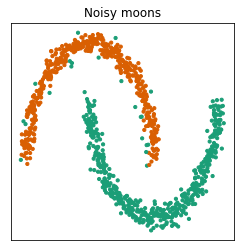

In [7]:
y_pred = optics.labels_.astype(int)

colors = list(map(colour,y_pred))

plt.figure(figsize=(4, 4))
plt.title("Noisy moons")
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors)
plt.xticks(())
plt.yticks(())
plt.show()

### Ahora vamos a ver que hizo OPTICS, visualizando la curva de reachability-distances

In [9]:
from sklearn.cluster import cluster_optics_dbscan

space = np.arange(len(X))
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

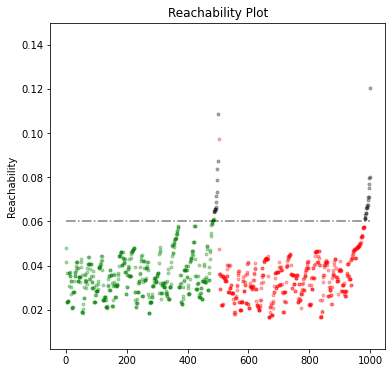

In [11]:
_, ax = plt.subplots(figsize=(6, 6))

# Reachability plot
colors = ["g.", "r."]
for klass, color in zip(range(0, 2), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax.plot(Xk, Rk, color, alpha=0.3)
ax.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax.plot(space, np.full_like(space, 0.06, dtype=float), "k-.", alpha=0.5)
ax.set_ylim(top=0.15)
ax.set_ylabel("Reachability")
ax.set_title("Reachability Plot")
plt.show()

### Es decir, la condición de tamaño me dice que debo cortar en 0.06. Esto es parecido a lo que encontrábamos visualmente en DBSCAN.